In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

with open('../data/wordlist-eng.txt', 'r') as file:
    words = [word.strip('\n') for word in file.readlines()]

In [2]:
sys.path.insert(0,"..")

In [9]:
from utils.game import Game
from utils.spymaster import SpyMaster
from utils.operative import Operative

In [4]:
parameter_search_df = pd.read_csv("parameter_search_results.csv")

In [5]:
parameter_search_df.head()

,number,value,datetime_start,datetime_complete,duration,params_alpha1,params_alpha2,params_alpha3,params_alpha4,params_alpha5,state
0,0,1.030,2021-09-02 00:51:45.254804,2021-09-02 00:56:23.918647,0 days 00:04:38.663843,0.061077,0.001395,0.000808,0.016042,0.075488,COMPLETE
1,1,-0.282,2021-09-02 00:56:23.919519,2021-09-02 01:00:59.639727,0 days 00:04:35.720208,0.004925,0.837639,0.054868,0.008389,0.003702,COMPLETE
2,2,0.546,2021-09-02 01:00:59.640587,2021-09-02 01:05:33.569610,0 days 00:04:33.929023,0.002359,0.082452,0.005679,0.000173,0.003910,COMPLETE
3,3,1.000,2021-09-02 01:05:33.570480,2021-09-02 01:10:07.658590,0 days 00:04:34.088110,0.089533,0.000537,0.000503,0.013372,0.013406,COMPLETE
4,4,0.462,2021-09-02 01:10:07.659433,2021-09-02 01:14:42.292715,0 days 00:04:34.633282,0.034483,0.249878,0.079035,0.027803,0.077584,COMPLETE


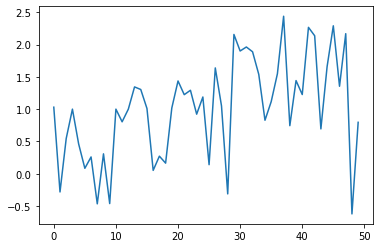

In [6]:
plt.plot(parameter_search_df['value'])

In [7]:
parameter_search_df.iloc[:,5:-1][parameter_search_df['value'] == 2.438]
# max(parameter_search_df['value'])

,params_alpha1,params_alpha2,params_alpha3,params_alpha4,params_alpha5
37,0.001191,0.000467,0.000434,0.132484,0.000843


In [12]:
Game.simulate_board(words)

({'blue': ['SOCK'],
  'orange': ['SCREEN',
   'GOLD',
   'IVORY',
   'MOSCOW',
   'TOOTH',
   'BATTERY',
   'CARD',
   'WHIP'],
  'white': ['CAST', 'BEAR', 'SNOWMAN', 'TIME', 'HAWK', 'BUG'],
  'black': ['REVOLUTION']},
 ['HAWK',
  'WHIP',
  'CAST',
  'TOOTH',
  'SCREEN',
  'SNOWMAN',
  'REVOLUTION',
  'CARD',
  'BUG',
  'TIME',
  'BATTERY',
  'BEAR',
  'MOSCOW',
  'SOCK',
  'GOLD',
  'IVORY'])

In [13]:
alpha1, alpha2, alpha3, alpha4, alpha5 = parameter_search_df.iloc[:,5:-1][parameter_search_df['value'] == 2.438]

for i in range(5):
    board_colour_dict, board_list = Game.simulate_board(words)
    spymaster = SpyMaster(board_colour_dict, board_list, my_team = 'blue', 
                          alpha1 = alpha1, alpha2 = alpha2,
                          alpha3 = alpha3, alpha4 = alpha4, 
                          alpha5 = alpha5)
    
    operative = Operative(spymaster.board_words)
    targets, proposal = spymaster.make_proposal()
    guess = operative.Guess(proposal, len(targets))
    score = 0
    for word in reversed(guess):
        if word in targets:
            score += 1
        elif word in spymaster.board_dict[spymaster.other_team]:
            score -= 1
            break
        elif word in spymaster.board_dict['black']:
            score = -len(spymaster.other_team_word_indices)
            break
        elif word in spymaster.board_dict['white']:
            break
    scores.append(score)
    print(i+1)

TypeError: Argument 'string' has incorrect type (expected str, got numpy.str_)